In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
tas_train = np.load('../Data/tas_train.npy')
psl_train = np.load('../Data/psl_train.npy')
nao_index_train = np.load('../Data/nao_index_train.npy')


(900, 2322)

In [6]:
pca = PCA(n_components=50) #90% explained variance

In [7]:
pca.fit(tas_train)

PCA(n_components=50)

In [8]:
print(pca.explained_variance_ratio_)

[0.139324   0.08886949 0.08387699 0.06725111 0.05784979 0.04628902
 0.04110706 0.03692171 0.0271803  0.02323685 0.02261667 0.02123957
 0.01944782 0.01610227 0.01520486 0.01439683 0.01356993 0.0122921
 0.01148158 0.01075819 0.00956839 0.00779558 0.0072168  0.00705343
 0.00634401 0.00613418 0.00562966 0.00522838 0.00477947 0.00455712
 0.00425549 0.00418571 0.00402752 0.0039618  0.0036004  0.00336402
 0.00314784 0.0031243  0.0029651  0.00289866 0.00271184 0.00261066
 0.00256204 0.00246324 0.00237084 0.00227473 0.00217784 0.00212424
 0.00208642 0.00196574]


In [26]:
print(pca.explained_variance_ratio_.sum())

0.8921775439453584


In [27]:
psl_train = np.load('/HZG_Challenge/psl_train.npy')

In [28]:
psl_train.shape

(900, 2322)

In [30]:
tas_df = pd.DataFrame(tas_train)

In [31]:
tas_df.describe() #standardized

,0,1,2,3,4,5,6,7,8,9,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.020948,-0.013025,-0.005528,-0.004910,-0.010288,-0.012511,-0.009414,-0.013177,-0.021392,-0.021177,...,-0.014952,-0.013712,-0.012492,-0.011316,-0.011490,-0.010732,-0.010055,-0.008315,-0.007237,-0.006386
std,1.002389,1.006931,1.001695,0.994710,0.985836,0.998403,0.998139,0.988219,0.987657,0.993144,...,0.998259,1.000685,1.002759,1.002807,1.002253,1.001752,1.000898,0.999298,0.998021,0.996583
min,-3.134698,-3.746261,-3.537526,-2.862681,-2.720412,-3.205618,-3.302332,-3.331811,-2.774170,-3.138117,...,-3.018653,-2.914195,-2.922373,-2.921236,-2.884788,-2.814241,-2.890756,-2.871817,-2.918600,-3.094072
25%,-0.706552,-0.686002,-0.707085,-0.663640,-0.657127,-0.702608,-0.714306,-0.688936,-0.697033,-0.645607,...,-0.676842,-0.696944,-0.694308,-0.700104,-0.698966,-0.696045,-0.717820,-0.688813,-0.690783,-0.686476
50%,-0.005425,0.009054,-0.002138,-0.043877,-0.047445,-0.032554,0.010525,-0.030677,-0.015193,-0.036118,...,-0.073112,-0.073332,-0.055754,-0.060289,-0.043570,-0.039844,-0.023972,-0.037384,-0.026627,-0.011707
75%,0.630920,0.646854,0.667608,0.617118,0.630473,0.631920,0.669183,0.654021,0.614531,0.595407,...,0.675336,0.668091,0.671121,0.695338,0.677894,0.700986,0.705812,0.691964,0.706714,0.726006
max,3.925143,3.823735,3.794156,3.512680,3.482570,3.502101,2.873264,3.155710,3.568678,3.828615,...,3.430091,3.499839,3.441948,3.410424,3.338995,3.246259,3.059535,2.817260,2.617918,2.478982


In [32]:
psl_df = pd.DataFrame(psl_train)

In [33]:
psl_df.describe() #standardized

,0,1,2,3,4,5,6,7,8,9,...,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.014958,0.014092,0.011558,0.012460,0.015304,0.014469,0.002396,0.007712,0.019987,0.023728,...,0.001946,0.001950,0.001935,0.001903,0.001860,0.001807,0.001743,0.001664,0.001568,0.001456
std,0.997529,0.997301,0.993635,0.990424,0.987297,1.005007,0.998621,0.995154,0.991564,0.990769,...,1.003276,1.003139,1.002999,1.002867,1.002731,1.002569,1.002358,1.002092,1.001789,1.001485
min,-3.374068,-3.374570,-3.421575,-3.459663,-3.304775,-3.465212,-2.746971,-3.501470,-3.830765,-3.213549,...,-3.073359,-3.109466,-3.178130,-3.236075,-3.282917,-3.318357,-3.342898,-3.356984,-3.397218,-3.440366
25%,-0.616754,-0.633600,-0.637868,-0.608031,-0.597125,-0.611817,-0.681468,-0.629243,-0.649858,-0.646091,...,-0.666118,-0.672103,-0.669117,-0.663311,-0.666471,-0.660451,-0.650379,-0.651250,-0.643196,-0.649224
50%,0.035026,0.042162,0.009297,0.047349,0.047537,0.038154,-0.112574,0.012083,0.057638,0.054153,...,-0.052803,-0.042995,-0.035046,-0.026909,-0.031737,-0.022591,-0.033997,-0.025252,-0.027156,-0.032998
75%,0.671336,0.655331,0.658158,0.694540,0.669270,0.706511,0.670889,0.601500,0.700216,0.727350,...,0.689055,0.690456,0.709077,0.716162,0.700813,0.685603,0.666954,0.667553,0.664425,0.657458
max,3.156430,3.323535,3.159214,3.084726,3.282553,3.027048,3.937400,3.378574,2.488252,2.506930,...,3.412569,3.397225,3.374989,3.345648,3.309926,3.269560,3.226130,3.181619,3.136968,3.092967


In [2]:
nao_index=np.load('/HZG_Challenge/nao_index_train.npy')

In [3]:
nao_index.shape

(900,)

In [4]:
nao_index.mean()

0.015958945620611117

In [5]:
nao_index.std()

1.001579576666294

In [14]:
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [15]:
nao_index_cat = kbin.fit_transform(nao_index.reshape(-1,1))

In [16]:
resh =nao_index_cat.reshape(900,)

In [17]:
ser = pd.Series(resh)

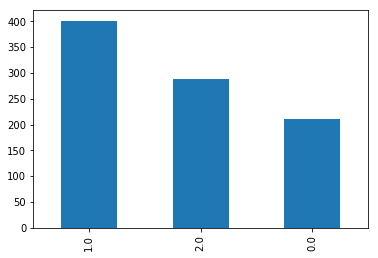

In [18]:
ser.value_counts().plot(kind='bar')

In [13]:
kbin.bin_edges_

array([array([-3.85065722, -1.17055278, -0.15488502,  0.77288943,  2.88942409])],
      dtype=object)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
